# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import gym
import random
import os
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

In [2]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [3]:
env = UnityEnvironment(file_name='/Users/hiroaki-hamada/Documents/Udacity/Project2/Reacher.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations[0]
state_size = states.shape[0]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 33 agents. Each observes a state with length: 33
The state for the first agent looks like: 0.0


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [6]:
#env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#states = env_info.vector_observations                  # get the current state (for each agent)
#scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#while True:
#   actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#   env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#  next_states = env_info.vector_observations         # get next state (for each agent)
#   rewards = env_info.rewards                         # get reward (for each agent)
#    dones = env_info.local_done                        # see if episode finished
 #   scores += env_info.rewards                         # update the score (for each agent)
 #   states = next_states                               # roll over states to next time step
 #   if np.any(dones):                                  # exit loop if episode finished
 #       break
#print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [7]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [8]:
def ddpg(print_every=10, max_t=1000, learn_every=20, num_learn=10):
    n_episodes = 1000
    scores = []
    scores_window = deque(maxlen=100)

    for episode in range(n_episodes):
        env_info = env.reset(train_mode=True)[brain_name]            # reset the environment
        agent.reset() 
        states = env_info.vector_observations
        score = np.zeros(n_agents)
        
        for t in range(max_t):
            actions = agent.act(states)
        
            env_info = env.step( actions )[brain_name]               # send the action to the environment                            
            next_states = env_info.vector_observations               # get the next state        
            rewards = env_info.rewards                               # get the reward        
            dones = env_info.local_done                              # see if episode has finished        

            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done) # send actions to the agent

            score += env_info.rewards                                         # update the score
        
            states = next_states                                     # roll over the state to next time step        
                                                      
            if t%learn_every == 0:
                for _ in range(num_learn):
                    agent.start_learn()
                    
            if np.any( dones ):                                          # exit loop if episode finished        
                break                                        

        scores.append(score)
        scores_window.append(score)

        print('\rEpisode {} \t Score: {:.2f} \tAverage Score: {:.2f}'.format(episode, np.mean(score), np.mean( scores_window)), end="")
        
        if episode % print_every == 0:
            print('\rEpisode {} \t Score: {:.2f} \tAverage Score: {:.2f}'.format(episode, np.mean(score), np.mean(scores_window)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        
        if np.mean(scores_window)>=30.0 and episode >= 100:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(episode, np.mean(scores_window)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
    
    return scores


In [9]:

n_agents = len(env_info.agents)
CHECKPOINT_FOLDER = './'

agent = Agent(state_size=state_size, action_size=action_size, random_seed=10)

Episode 0 	 Score: 1.03 	Average Score: 1.03
Episode 10 	 Score: 0.86 	Average Score: 0.67
Episode 20 	 Score: 1.23 	Average Score: 0.75
Episode 30 	 Score: 1.42 	Average Score: 1.13
Episode 40 	 Score: 2.92 	Average Score: 1.61
Episode 50 	 Score: 6.26 	Average Score: 2.04
Episode 60 	 Score: 6.93 	Average Score: 2.70
Episode 70 	 Score: 6.41 	Average Score: 3.087
Episode 80 	 Score: 4.43 	Average Score: 3.42
Episode 90 	 Score: 8.78 	Average Score: 4.113
Episode 100 	 Score: 8.25 	Average Score: 4.52
Episode 110 	 Score: 8.36 	Average Score: 5.435
Episode 120 	 Score: 17.42 	Average Score: 6.58
Episode 130 	 Score: 18.89 	Average Score: 7.95
Episode 140 	 Score: 12.62 	Average Score: 9.14
Episode 150 	 Score: 18.93 	Average Score: 10.57
Episode 160 	 Score: 22.25 	Average Score: 11.85
Episode 170 	 Score: 23.97 	Average Score: 13.66
Episode 180 	 Score: 14.68 	Average Score: 14.90
Episode 190 	 Score: 12.87 	Average Score: 16.36
Episode 200 	 Score: 31.88 	Average Score: 18.11
Episode 210 	 Score: 26.10 	Average Score: 19.18
Episode 220 	 Score: 16.49 	Average Score: 19.84
Episode 230 	 Score: 10.75 	Average Score: 20.51
Episode 240 	 Score: 33.40 	Average Score: 21.25
Episode 250 	 Score: 32.01 	Average Score: 22.26
Episode 260 	 Score: 31.97 	Average Score: 22.90
Episode 270 	 Score: 18.45 	Average Score: 22.78
Episode 280 	 Score: 33.53 	Average Score: 23.95
Episode 290 	 Score: 16.05 	Average Score: 23.97
Episode 300 	 Score: 32.03 	Average Score: 23.73
Episode 310 	 Score: 28.93 	Average Score: 23.96
Episode 320 	 Score: 28.90 	Average Score: 24.74
Episode 330 	 Score: 22.56 	Average Score: 24.83
Episode 340 	 Score: 36.11 	Average Score: 24.81
Episode 350 	 Score: 21.36 	Average Score: 23.44
Episode 355 	 Score: 14.83 	Average Score: 23.28


In [10]:
scores = ddpg()

Episode 0 	 Score: 0.90 	Average Score: 0.90
Episode 10 	 Score: 32.43 	Average Score: 15.25
Episode 20 	 Score: 34.49 	Average Score: 22.92
Episode 30 	 Score: 35.22 	Average Score: 26.77
Episode 40 	 Score: 36.85 	Average Score: 28.46
Episode 50 	 Score: 35.54 	Average Score: 29.82
Episode 60 	 Score: 32.68 	Average Score: 30.56
Episode 70 	 Score: 34.44 	Average Score: 30.96
Episode 80 	 Score: 35.42 	Average Score: 31.45
Episode 90 	 Score: 36.36 	Average Score: 31.86
Episode 100 	 Score: 34.65 	Average Score: 32.43

Environment solved in 100 episodes!	Average Score: 32.43


Text(0, 0.5, 'Scores')

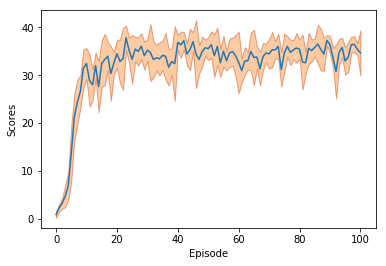

In [12]:
error = np.std(scores,axis=1)
x = np.linspace(0,len(scores)-1,len(scores))
plt.plot(x, np.mean(scores,1))
plt.fill_between(x, np.mean(scores,1)-error, np.mean(scores,1)+error,
    alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
plt.xlabel('Episode')
plt.ylabel('Scores')

# 5. Visualize the learned agent

In [13]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth', map_location='cpu'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth', map_location='cpu'))

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)

while True:
    actions = agent.act(states)                        # select actions from loaded model agent
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Average score: {}'.format(np.mean(scores)))

Average score: 35.81899919938296


In [14]:
env.close()